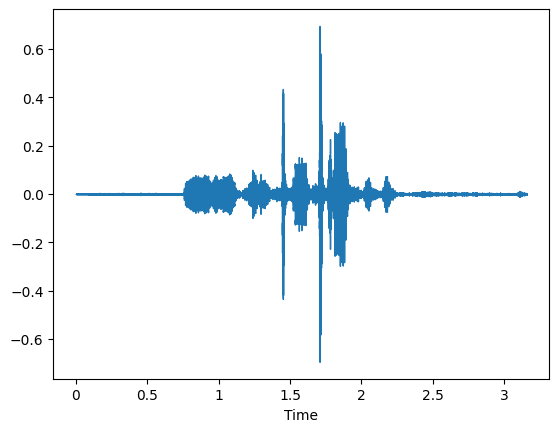

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import soundfile as sf

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load('/content/Lab1_voice.wav')
librosa.display.waveshow(y)

In [2]:
#Vowels
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def plot_fft(signal, sample_rate):
    fft_output = np.fft.fft(signal)
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/sample_rate)

    # Taking only positive frequencies and corresponding FFT values
    positive_freq = freq[:n//2]
    magnitude = np.abs(fft_output[:n//2])

    # Plotting the amplitude spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(positive_freq, magnitude)
    plt.title('Amplitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

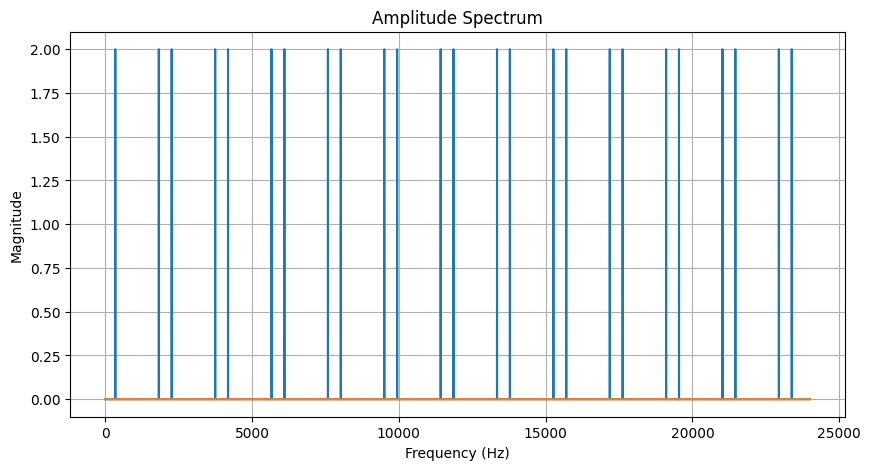

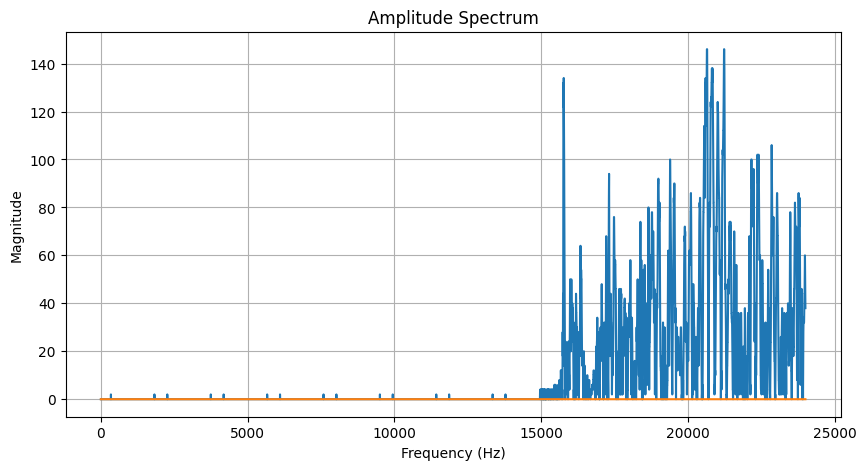

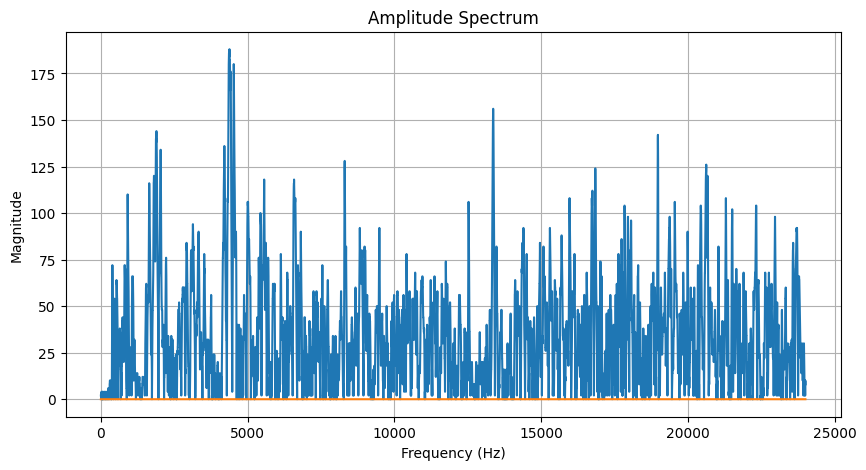

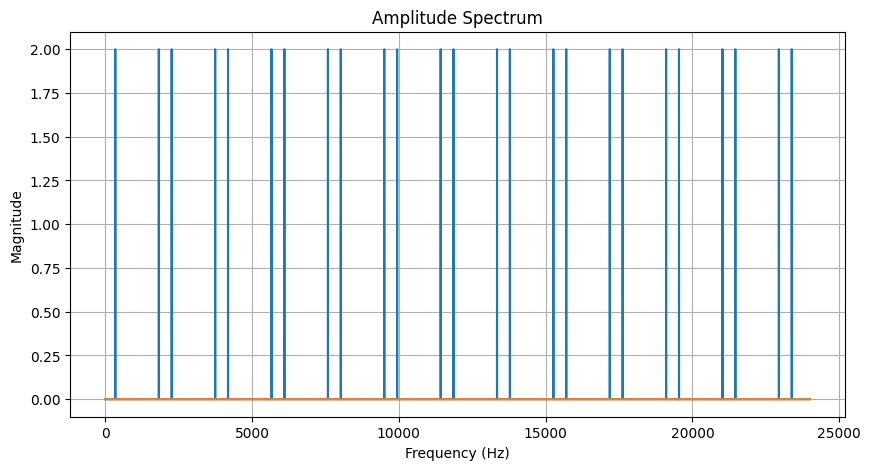

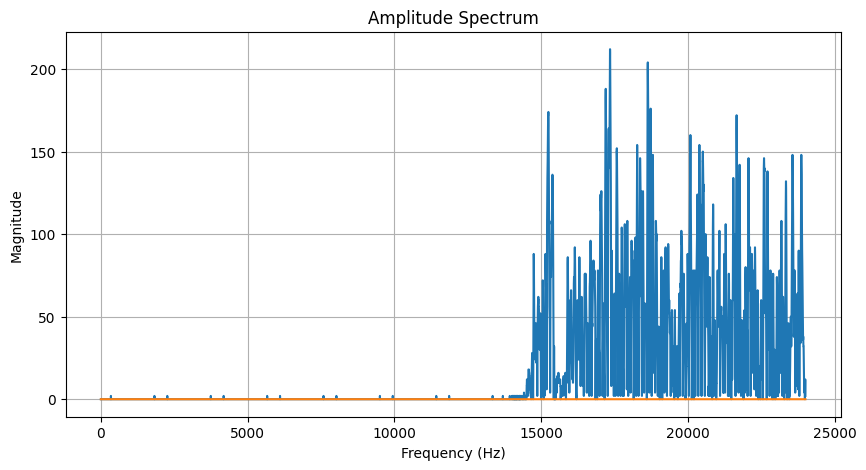

In [3]:
vowel_sounds = ['a.wav', 'e.wav', 'i.wav', 'o.wav', 'u.wav']

for vowel_sound in vowel_sounds:
    sample_rate, signal = wavfile.read(vowel_sound)

    portion_length = int(0.5 * sample_rate)
    vowel_portion = signal[:portion_length]

    # Plotting FFT for the vowel portion
    plot_fft(vowel_portion, sample_rate)

In [9]:
#Consonants
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def plot_fft(signal, sample_rate):
    fft_output = np.fft.fft(signal)
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/sample_rate)

    # Taking only positive frequencies and corresponding FFT values
    positive_freq = freq[:n//2]
    magnitude = np.abs(fft_output[:n//2])

    # Plotting the amplitude spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(positive_freq, magnitude)
    plt.title('Amplitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

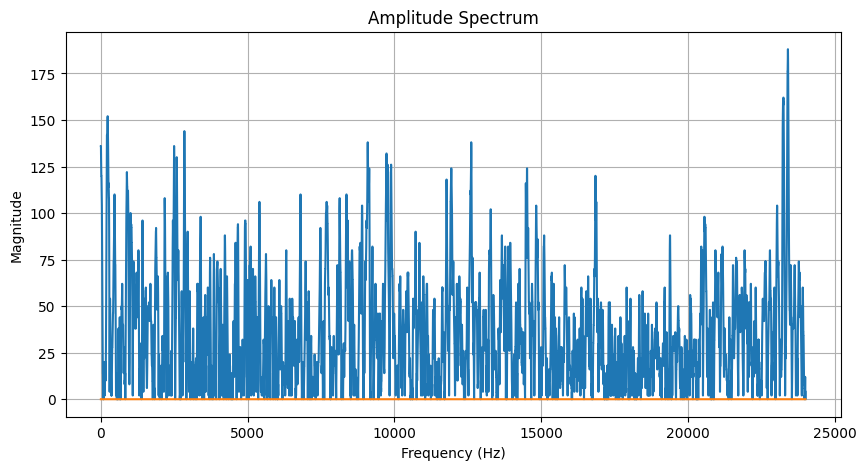

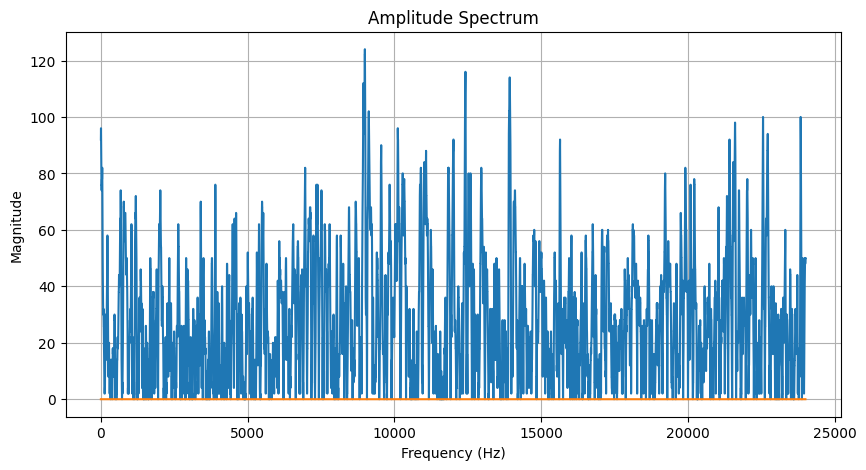

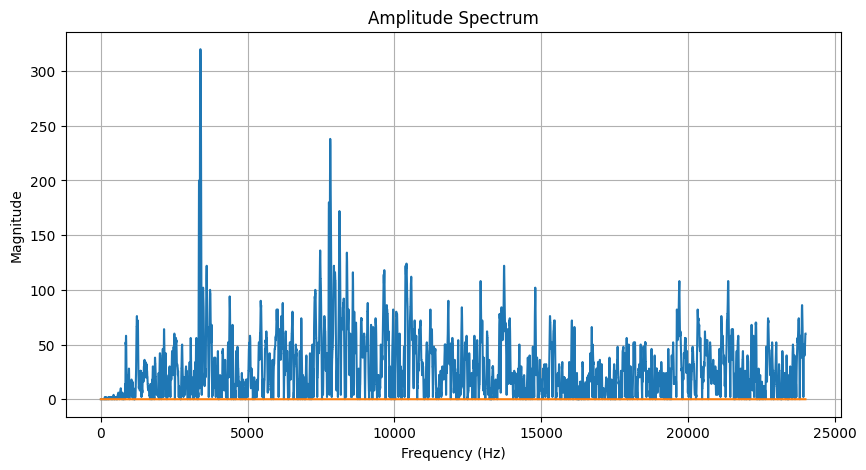

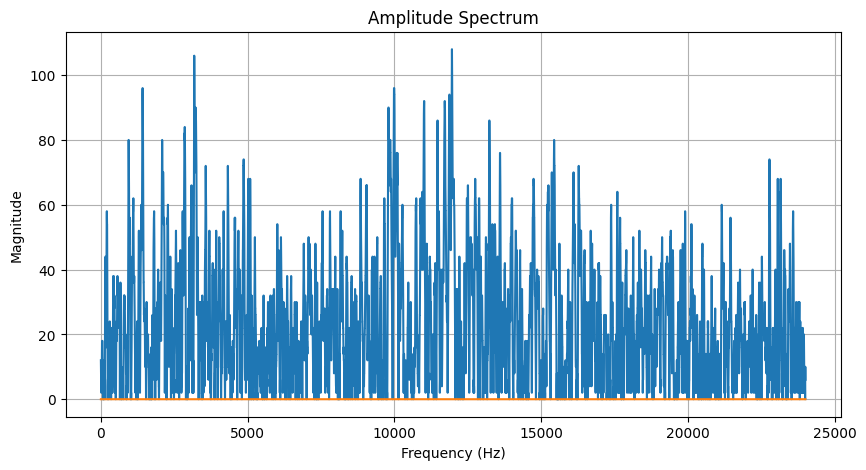

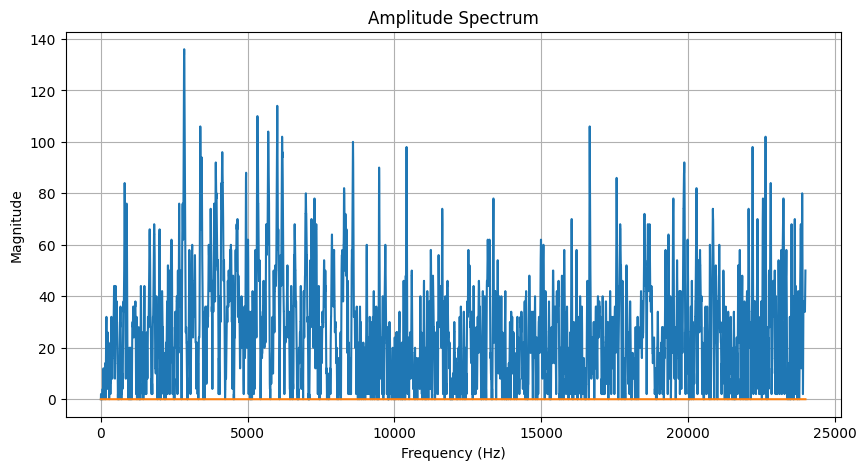

In [10]:
vowel_sounds = ['b.wav', 'g.wav', 'h.wav', 'k.wav', 'n.wav']

for vowel_sound in vowel_sounds:
    sample_rate, signal = wavfile.read(vowel_sound)

    portion_length = int(0.5 * sample_rate)
    vowel_portion = signal[:portion_length]

    # Plotting FFT for the vowel portion
    plot_fft(vowel_portion, sample_rate)

Number of Silence/Non-voiced Segments Detected: 1929


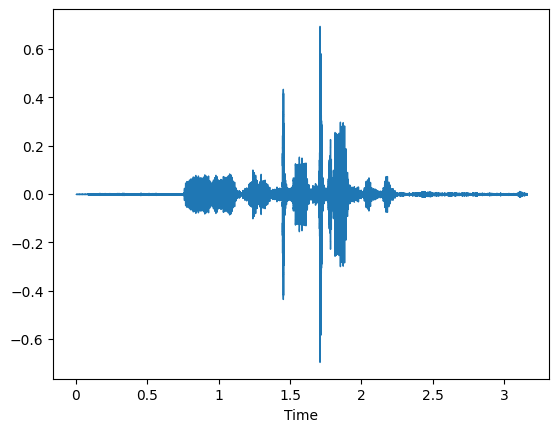

In [13]:
import numpy as np
import librosa
import librosa.display

def extract_segments(signal, threshold):
    segments = []
    current_segment = []
    for i in range(len(signal)):
        if abs(signal[i]) <= threshold:
            current_segment.append(i)
        elif current_segment:
            segments.append(current_segment)
            current_segment = []
    return segments

def extract_sounds(segments):
    sounds = []
    for segment in segments:
        sound = signal[segment[0]:segment[-1]+1]
        sounds.append(sound)
    return sounds

audio_file_path = '/content/Lab1_voice.wav'
signal, sample_rate = librosa.load(audio_file_path, sr=None)

threshold = 0.0001

segments = extract_segments(signal, threshold)

sounds = extract_sounds(segments)

librosa.display.waveshow(signal, sr=sample_rate)
print("Number of Silence/Non-voiced Segments Detected:", len(sounds))


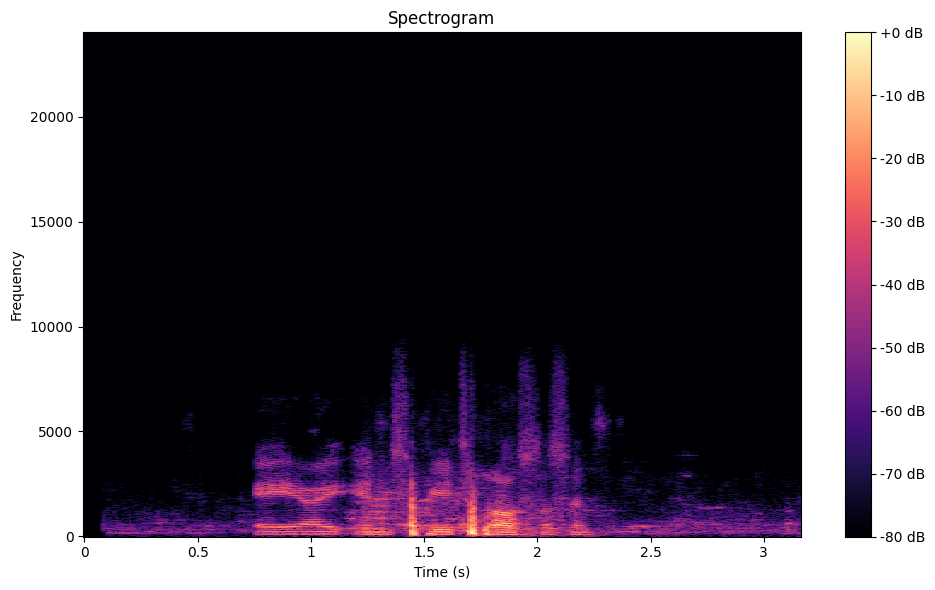

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load the audio file
audio_file_path = '/content/Lab1_voice.wav'
signal, sample_rate = librosa.load(audio_file_path, sr=None)  # Preserve the original sampling rate

spectrogram = np.abs(librosa.stft(signal))

plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
